In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [15]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia2.csv')
data.head()

,Age_of_Participants,Gender,Marital_Status,Type_of_Family,Level_of_Education,Occupational_Status,Area_of_Residence,Economic_Class,Diagnosis,Severity,...,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,0,1,2,6,1,1,1,1,1,...,75,100,90.0,65,92,100.0,50.0,82.3,80.1,0
1,18,1,1,2,2,1,1,1,1,1,...,100,100,100.0,90,92,100.0,50.0,94.0,89.6,0
2,13,0,1,2,2,1,0,1,1,0,...,100,100,70.0,100,100,100.0,75.0,90.0,91.5,0
3,14,0,1,1,2,1,0,1,1,0,...,100,100,100.0,90,92,100.0,52.5,94.0,89.9,0
4,13,1,1,2,5,1,1,1,1,1,...,65,100,55.0,70,92,100.0,42.5,72.3,73.9,0


In [16]:
# Split features and target
X = data.drop('Mental_Health_Status', axis=1)
y = data['Mental_Health_Status']

# Display the encoded dataset
print(X)
print(y)

     Age_of_Participants  Gender  Marital_Status  Type_of_Family  \
0                     15       0               1               2   
1                     18       1               1               2   
2                     13       0               1               2   
3                     14       0               1               1   
4                     13       1               1               2   
..                   ...     ...             ...             ...   
351                   12       0               1               0   
352                   12       1               1               1   
353                   13       0               1               2   
354                   17       0               1               2   
355                   12       0               1               2   

     Level_of_Education  Occupational_Status  Area_of_Residence  \
0                     6                    1                  1   
1                     2                    1     

In [4]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Scale the feature matrix for Chi-squared test (it requires non-negative values)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 1. Chi-squared Test
chi2_selector = SelectKBest(score_func=chi2, k='all')  # 'all' means we calculate scores for all features
X_chi2_selected = chi2_selector.fit_transform(X_scaled, y)

# Get scores and feature names
chi2_scores = chi2_selector.scores_
chi2_features = X.columns

# Print Chi-squared scores for each feature
print("Chi-squared Test Scores:")
for feature, score in zip(chi2_features, chi2_scores):
    print(f"{feature}: {score:.2f}")

# 2. ANOVA F-test
f_test_selector = SelectKBest(score_func=f_classif, k='all')
X_f_test_selected = f_test_selector.fit_transform(X, y)

# Get scores and feature names
f_test_scores = f_test_selector.scores_

print("\nANOVA F-test Scores:")
for feature, score in zip(X.columns, f_test_scores):
    print(f"{feature}: {score:.2f}")

# 3. Mutual Information
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_mutual_info_selected = mutual_info_selector.fit_transform(X, y)

# Get scores and feature names
mutual_info_scores = mutual_info_selector.scores_

print("\nMutual Information Scores:")
for feature, score in zip(X.columns, mutual_info_scores):
    print(f"{feature}: {score:.2f}")

# After selecting features, you can reduce the dataset
# Example: Keep top 5 features from Chi-squared test
top_features_idx = chi2_selector.get_support(indices=True)[:5]
X_filtered = X.iloc[:, top_features_idx]

print("\nTop features selected based on Chi-squared test:")
print(X_filtered.head())


Chi-squared Test Scores:
Age_of_Participants: 0.79
Gender: 3.02
Marital_Status: 0.41
Type_of_Family: 0.40
Level_of_Education: 0.02
Occupational_Status: 0.00
Area_of_Residence: 0.36
Economic_Class: 0.01
Diagnosis: 0.02
Severity: 0.02
Transfusion_Status: 1.53
Frequency_of_Blood_Transfusion: 0.09
Previous_3Months_Transfution: 0.00
Splenectomy_Status: 1.08
Comorbidities_Status: 0.06
Ironchelating_Therapy_Status: 0.21
Medical_Expense: 0.24
General_Health: 1.54
Physical_Functioning: 4.77
Role_Physical: 33.08
Bodily_Pain: 6.16
Vitality: 7.32
Mental_Health: 6.83
Role_Emotional: 36.93
Social_Functioning: 4.65
Physical_Health_Summary: 7.12
Total_SF_Score: 9.34

ANOVA F-test Scores:
Age_of_Participants: 4.57
Gender: 6.67
Marital_Status: 2.72
Type_of_Family: 4.93
Level_of_Education: 0.08
Occupational_Status: 0.00
Area_of_Residence: 0.73
Economic_Class: 0.10
Diagnosis: 0.16
Severity: 0.04
Transfusion_Status: 1.68
Frequency_of_Blood_Transfusion: 0.35
Previous_3Months_Transfution: 0.03
Splenectomy_St

<ipython-input-6-e7f6ad3cd8f4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi2', y='Feature', data=feature_scores.sort_values(by='Chi2', ascending=False), palette='Blues_r')


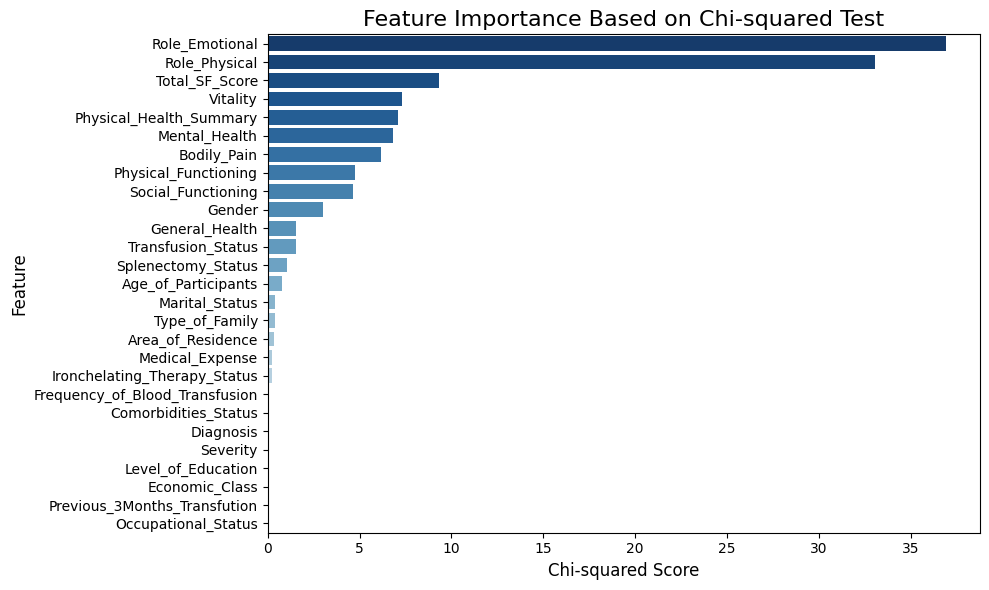

<ipython-input-6-e7f6ad3cd8f4>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-test', y='Feature', data=feature_scores.sort_values(by='F-test', ascending=False), palette='Greens_r')


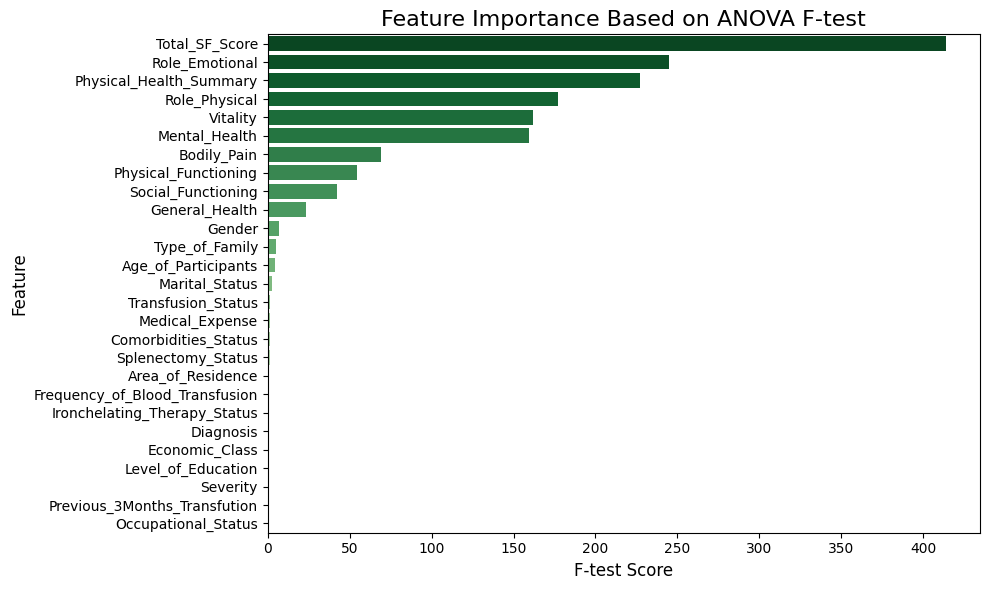

<ipython-input-6-e7f6ad3cd8f4>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=feature_scores.sort_values(by='Mutual Information', ascending=False), palette='Oranges_r')


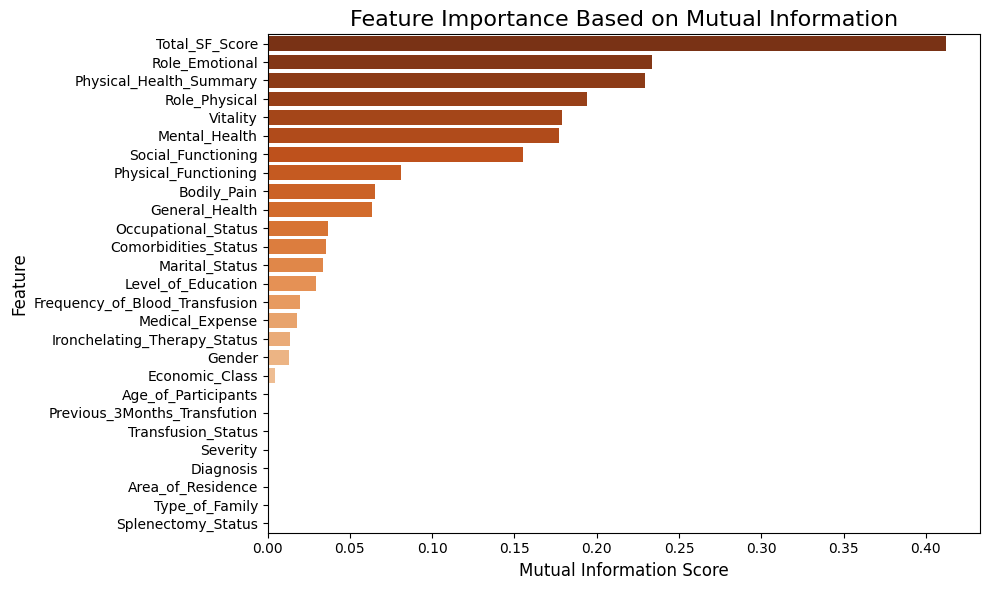

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert scores to DataFrame for easy visualization
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2': chi2_scores,
    'F-test': f_test_scores,
    'Mutual Information': mutual_info_scores
})

# Plot Chi-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi2', y='Feature', data=feature_scores.sort_values(by='Chi2', ascending=False), palette='Blues_r')
plt.title('Feature Importance Based on Chi-squared Test', fontsize=16)
plt.xlabel('Chi-squared Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot F-test scores
plt.figure(figsize=(10, 6))
sns.barplot(x='F-test', y='Feature', data=feature_scores.sort_values(by='F-test', ascending=False), palette='Greens_r')
plt.title('Feature Importance Based on ANOVA F-test', fontsize=16)
plt.xlabel('F-test Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot Mutual Information scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=feature_scores.sort_values(by='Mutual Information', ascending=False), palette='Oranges_r')
plt.title('Feature Importance Based on Mutual Information', fontsize=16)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-7-4b9ef61771ab>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='Oranges_r')


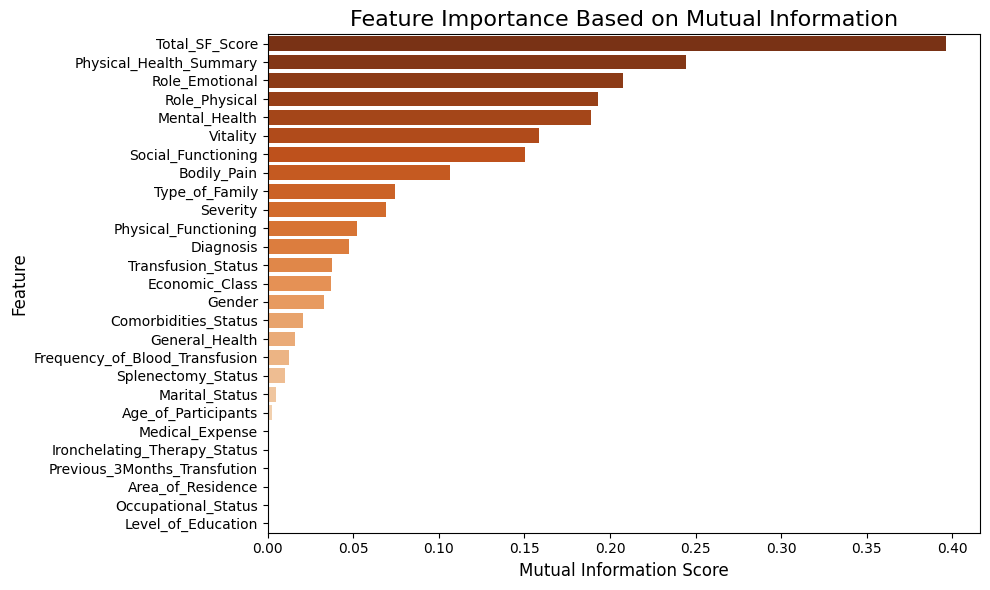

<ipython-input-7-4b9ef61771ab>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Normalized RFE Score', y='Feature', data=rfe_scores_df, palette='Blues_r')


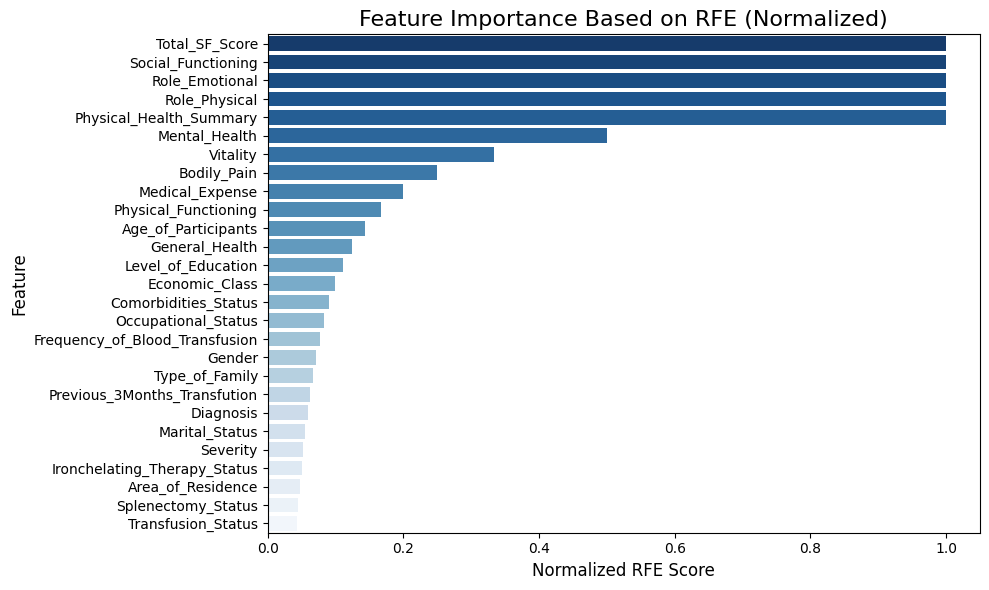

<ipython-input-7-4b9ef61771ab>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


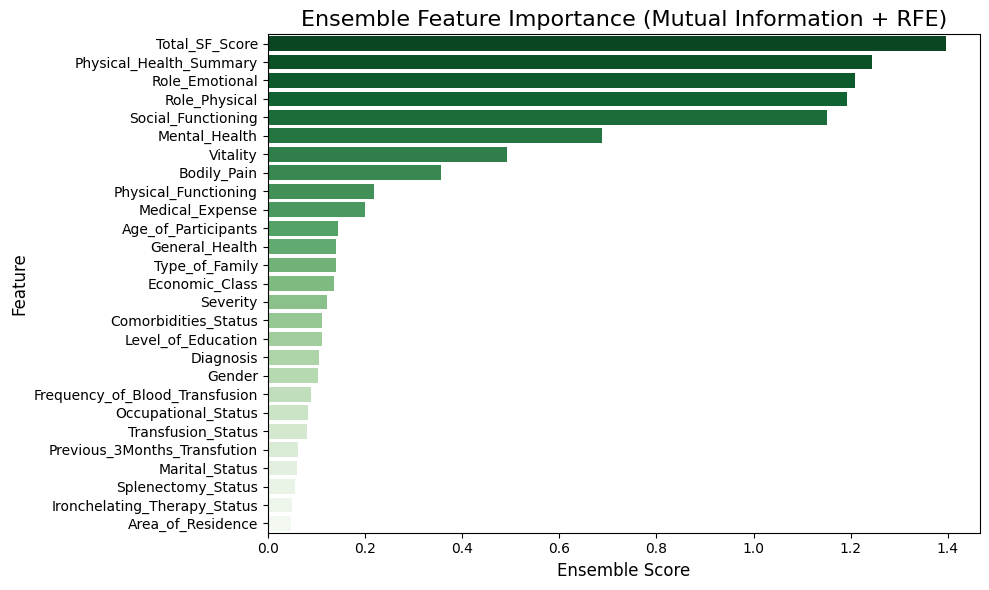

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are already defined and dataset is pre-split into train/test/validation sets

# 1. **Filter-Based Mutual Information**
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

# 2. **Wrapper-Based RFE**
rf_classifier = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # Adjust number of features to select
rfe.fit(X_train, y_train)

# Create DataFrame for RFE scores
rfe_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'RFE Ranking': rfe.ranking_
}).sort_values(by='RFE Ranking')

# Normalize the RFE scores for comparability (lower is better, so invert the scale)
rfe_scores_df['Normalized RFE Score'] = 1 / rfe_scores_df['RFE Ranking']

# 3. **Combine Both Scores**
combined_scores_df = mi_scores_df.merge(rfe_scores_df, on='Feature')
combined_scores_df['Ensemble Score'] = (
    combined_scores_df['Mutual Information'] + combined_scores_df['Normalized RFE Score']
)

# Sort by Ensemble Score
combined_scores_df = combined_scores_df.sort_values(by='Ensemble Score', ascending=False)

# 4. **Visualization**

# Plot Mutual Information
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='Oranges_r')
plt.title('Feature Importance Based on Mutual Information', fontsize=16)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot RFE Normalized Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Normalized RFE Score', y='Feature', data=rfe_scores_df, palette='Blues_r')
plt.title('Feature Importance Based on RFE (Normalized)', fontsize=16)
plt.xlabel('Normalized RFE Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot Combined Ensemble Scores
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Ensemble Score',
    y='Feature',
    data=combined_scores_df,
    palette='Greens_r'
)
plt.title('Ensemble Feature Importance (Mutual Information + RFE)', fontsize=16)
plt.xlabel('Ensemble Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


In [8]:
!pip install shap scikit-learn deap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.5 MB/s eta 0:00:00


In [19]:
!pip install scikit-learn xgboost torch torch_geometric pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 787.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data


# Stage 1: Mutual Information Pre-Filtering
def mutual_info_filter(X, y, threshold_percentile=70):
    mi_scores = mutual_info_classif(X, y, random_state=42)
    mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
    threshold = np.percentile(mi_scores, 100 - threshold_percentile)
    selected_features = mi_df[mi_df['MI_Score'] >= threshold]['Feature'].tolist()
    return selected_features, mi_df

# Stage 2: RF + XGBoost Ensemble with RFE
def ensemble_rfe(X, y, selected_features):
    X_subset = X[selected_features]

    # Standardize continuous features
    scaler = StandardScaler()
    X_subset_scaled = scaler.fit_transform(X_subset)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_subset_scaled, y)
    rf_importance = rf.feature_importances_

    # XGBoost
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_subset_scaled, y)
    xgb_importance = xgb_model.feature_importances_

    # Combined importance (weighted average)
    combined_importance = 0.5 * rf_importance + 0.5 * xgb_importance

    # RFE
    rfe = RFE(estimator=rf, n_features_to_select=10, step=1)
    rfe.fit(X_subset_scaled, y)
    rfe_ranking = pd.DataFrame({
        'Feature': selected_features,
        'RFE_Rank': rfe.ranking_,
        'Combined_Importance': combined_importance
    })
    return rfe_ranking[rfe_ranking['RFE_Rank'] == 1]['Feature'].tolist(), rfe_ranking

# Stage 3: Graph Attention Network for Dynamic Feature Interaction
def gat_feature_interaction(X, y, selected_features):
    X_subset = X[selected_features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_subset)

    # Create edge index based on feature correlations
    corr_matrix = np.corrcoef(X_scaled.T)
    edge_index = np.array(np.where(corr_matrix > 0.3))
    edge_index = torch.tensor(edge_index, dtype=torch.long)

    # Feature matrix as node features (samples as nodes, features as channels)
    x = torch.tensor(X_scaled, dtype=torch.float)  # Shape: [n_samples, n_features]

    # GAT model
    class GAT(torch.nn.Module):
        def __init__(self, in_channels, hidden_channels, out_channels):
            super(GAT, self).__init__()
            self.conv1 = GATConv(in_channels, hidden_channels, heads=4)
            self.conv2 = GATConv(hidden_channels * 4, out_channels, heads=1)

        def forward(self, x, edge_index):
            x = F.relu(self.conv1(x, edge_index))
            x = self.conv2(x, edge_index)
            return x

    # Initialize and train GAT
    model = GAT(in_channels=len(selected_features), hidden_channels=8, out_channels=1)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    data = Data(x=x, edge_index=edge_index)

    model.train()
    y_tensor = torch.tensor(y.values, dtype=torch.float).view(-1, 1)
    for _ in range(100):
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)  # Shape: [n_samples, 1]
        loss = F.mse_loss(out, y_tensor)
        loss.backward()
        optimizer.step()

    # Extract attention weights (feature importance from GAT)
    model.eval()
    with torch.no_grad():
        # Use the first GAT layer's attention weights to derive feature importance
        gat_out = model.conv1(data.x, data.edge_index)  # Shape: [n_samples, hidden_channels * heads]
        # Average attention across samples and heads to get per-feature importance
        gat_scores = torch.mean(gat_out, dim=0).view(-1, 4)  # 4 heads
        gat_scores = torch.mean(gat_scores, dim=1).numpy()  # Average across heads

    # Ensure length matches selected_features
    if len(gat_scores) != len(selected_features):
        # Fallback: Use absolute mean contribution if shape mismatch occurs
        gat_scores = np.abs(np.mean(X_scaled, axis=0))

    return pd.DataFrame({'Feature': selected_features, 'GAT_Score': gat_scores})

# AMSE-DFI Main Function
def amse_dfi(X, y):
    # Stage 1: MI Filtering
    mi_features, mi_df = mutual_info_filter(X, y)
    print("Stage 1 - MI Selected Features:", mi_features)

    # Stage 2: Ensemble RFE
    rfe_features, rfe_df = ensemble_rfe(X, y, mi_features)
    print("Stage 2 - RFE Selected Features:", rfe_features)

    # Stage 3: GAT Interaction
    gat_df = gat_feature_interaction(X, y, rfe_features)
    print("Stage 3 - GAT Scores:\n", gat_df)

    # Final Aggregation
    merged_df = mi_df.merge(rfe_df, on='Feature', how='outer').merge(gat_df, on='Feature', how='outer')
    merged_df.fillna(0, inplace=True)
    final_scores = (
        0.3 * merged_df['MI_Score'] +
        0.4 * merged_df['Combined_Importance'] +
        0.3 * merged_df['GAT_Score']
    )
    merged_df['Final_Score'] = final_scores / final_scores.max()

    return merged_df.sort_values('Final_Score', ascending=False)

# Run the model
result = amse_dfi(X, y)
print("\nFinal Feature Importance Ranking:\n", result[['Feature', 'Final_Score']])

Stage 1 - MI Selected Features: ['Gender', 'Type_of_Family', 'Occupational_Status', 'Area_of_Residence', 'Transfusion_Status', 'Frequency_of_Blood_Transfusion', 'Comorbidities_Status', 'Ironchelating_Therapy_Status', 'Medical_Expense', 'General_Health', 'Physical_Functioning', 'Role_Physical', 'Bodily_Pain', 'Vitality', 'Mental_Health', 'Role_Emotional', 'Social_Functioning', 'Physical_Health_Summary', 'Total_SF_Score']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:34:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stage 2 - RFE Selected Features: ['General_Health', 'Physical_Functioning', 'Role_Physical', 'Bodily_Pain', 'Vitality', 'Mental_Health', 'Role_Emotional', 'Social_Functioning', 'Physical_Health_Summary', 'Total_SF_Score']
Stage 3 - GAT Scores:
                    Feature     GAT_Score
0           General_Health  2.195497e-16
1     Physical_Functioning  9.979533e-17
2            Role_Physical  8.981580e-17
3              Bodily_Pain  1.946009e-16
4                 Vitality  1.596725e-16
5            Mental_Health  8.981580e-17
6           Role_Emotional  1.995907e-17
7       Social_Functioning  3.991813e-17
8  Physical_Health_Summary  1.297339e-16
9           Total_SF_Score  3.991813e-16

Final Feature Importance Ranking:
                            Feature  Final_Score
23                  Total_SF_Score     1.000000
16         Physical_Health_Summary     0.482142
18                  Role_Emotional     0.444953
19                   Role_Physical     0.413488
13                   Mental_

Stage 1 - MI Selected Features: ['Gender', 'Type_of_Family', 'Occupational_Status', 'Area_of_Residence', 'Transfusion_Status', 'Frequency_of_Blood_Transfusion', 'Comorbidities_Status', 'Ironchelating_Therapy_Status', 'Medical_Expense', 'General_Health', 'Physical_Functioning', 'Role_Physical', 'Bodily_Pain', 'Vitality', 'Mental_Health', 'Role_Emotional', 'Social_Functioning', 'Physical_Health_Summary', 'Total_SF_Score']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:34:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stage 2 - RFE Selected Features: ['General_Health', 'Physical_Functioning', 'Role_Physical', 'Bodily_Pain', 'Vitality', 'Mental_Health', 'Role_Emotional', 'Social_Functioning', 'Physical_Health_Summary', 'Total_SF_Score']
Stage 3 - GAT Scores:
                    Feature     GAT_Score
0           General_Health  2.195497e-16
1     Physical_Functioning  9.979533e-17
2            Role_Physical  8.981580e-17
3              Bodily_Pain  1.946009e-16
4                 Vitality  1.596725e-16
5            Mental_Health  8.981580e-17
6           Role_Emotional  1.995907e-17
7       Social_Functioning  3.991813e-17
8  Physical_Health_Summary  1.297339e-16
9           Total_SF_Score  3.991813e-16


<ipython-input-27-a10f3b57b67f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


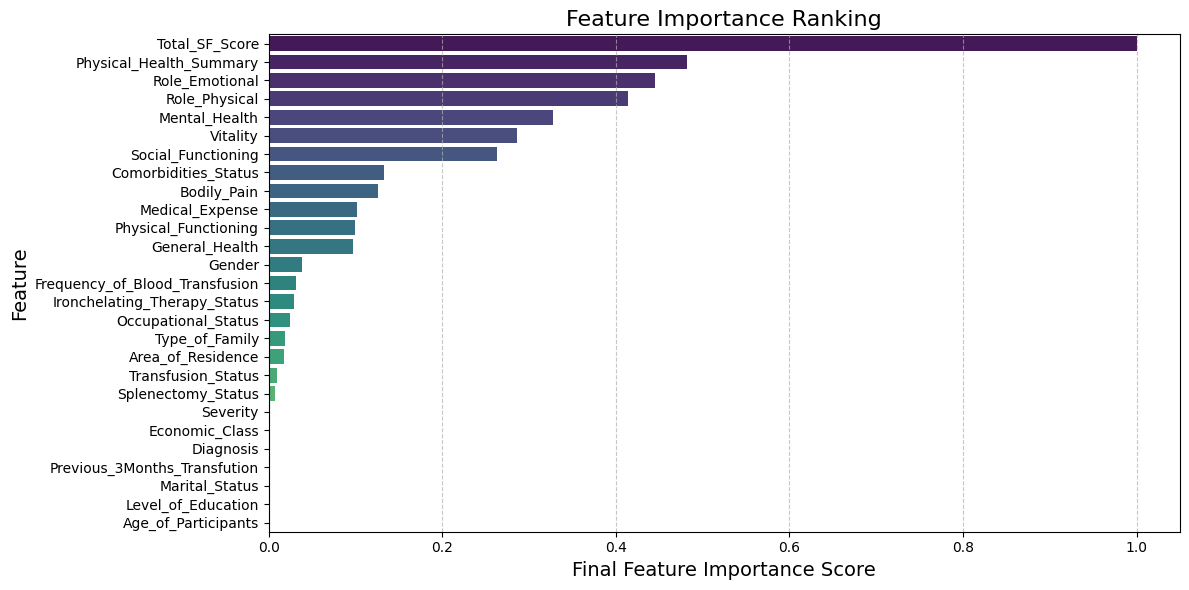

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Run the model and get the final feature importance
result = amse_dfi(X, y)

# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(
    y=result['Feature'],
    x=result['Final_Score'],
    palette='viridis'
)
plt.xlabel("Final Feature Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance Ranking", fontsize=16)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the figure for your paper
plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


Stage 1 - MI Selected Features: ['Gender', 'Type_of_Family', 'Occupational_Status', 'Area_of_Residence', 'Transfusion_Status', 'Frequency_of_Blood_Transfusion', 'Comorbidities_Status', 'Ironchelating_Therapy_Status', 'Medical_Expense', 'General_Health', 'Physical_Functioning', 'Role_Physical', 'Bodily_Pain', 'Vitality', 'Mental_Health', 'Role_Emotional', 'Social_Functioning', 'Physical_Health_Summary', 'Total_SF_Score']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:41:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stage 2 - RFE Selected Features: ['General_Health', 'Physical_Functioning', 'Role_Physical', 'Bodily_Pain', 'Vitality', 'Mental_Health', 'Role_Emotional', 'Social_Functioning', 'Physical_Health_Summary', 'Total_SF_Score']
Stage 3 - GAT Scores:
                    Feature     GAT_Score
0           General_Health  2.195497e-16
1     Physical_Functioning  9.979533e-17
2            Role_Physical  8.981580e-17
3              Bodily_Pain  1.946009e-16
4                 Vitality  1.596725e-16
5            Mental_Health  8.981580e-17
6           Role_Emotional  1.995907e-17
7       Social_Functioning  3.991813e-17
8  Physical_Health_Summary  1.297339e-16
9           Total_SF_Score  3.991813e-16


<ipython-input-29-7b95cc8d69eb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


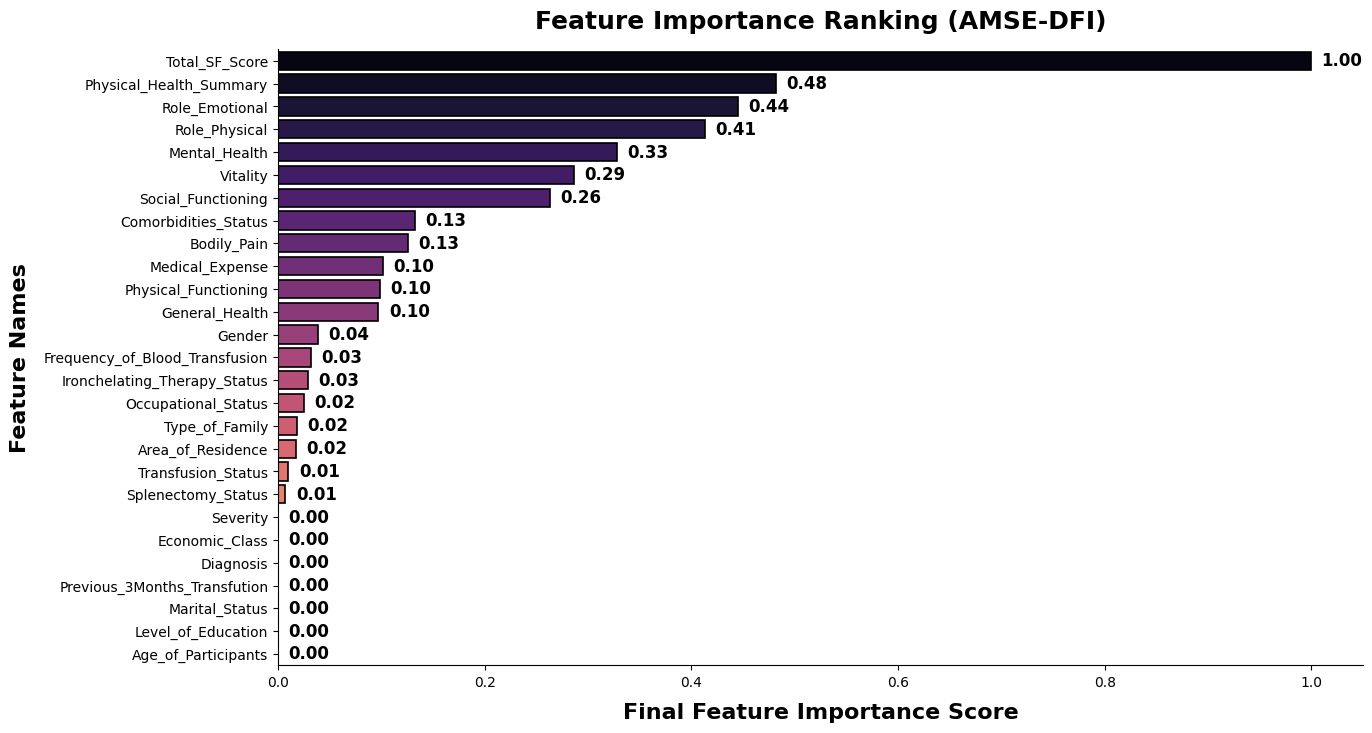

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Run the model and get the final feature importance
result = amse_dfi(X, y)

# Sort the features by importance (Top Features First)
result = result.sort_values('Final_Score', ascending=False)  # <-- CHANGED THIS LINE

# Create the figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the horizontal bar chart
sns.barplot(
    y=result['Feature'],
    x=result['Final_Score'],
    palette='magma',  # Professional colormap
    edgecolor='black',  # Sharp edges for clarity
    linewidth=1.2
)

# Add value labels to bars
for index, value in enumerate(result['Final_Score']):
    ax.text(value + 0.01, index, f"{value:.2f}",
            fontsize=12, color='black', va='center', fontweight='bold')

# Titles and labels
plt.xlabel("Final Feature Importance Score", fontsize=16, fontweight='bold', labelpad=10)
plt.ylabel("Feature Names", fontsize=16, fontweight='bold', labelpad=10)
plt.title("Feature Importance Ranking (AMSE-DFI)", fontsize=18, fontweight='bold', pad=15)

# Remove top and right spines for a cleaner look
sns.despine()

# Save as high-quality vector file for Q1 journal submission
plt.savefig("feature_importance.svg", format='svg', dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


Stage 1 - MI Selected Features: ['Gender', 'Type_of_Family', 'Occupational_Status', 'Area_of_Residence', 'Transfusion_Status', 'Frequency_of_Blood_Transfusion', 'Comorbidities_Status', 'Ironchelating_Therapy_Status', 'Medical_Expense', 'General_Health', 'Physical_Functioning', 'Role_Physical', 'Bodily_Pain', 'Vitality', 'Mental_Health', 'Role_Emotional', 'Social_Functioning', 'Physical_Health_Summary', 'Total_SF_Score']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:45:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stage 2 - RFE Selected Features: ['General_Health', 'Physical_Functioning', 'Role_Physical', 'Bodily_Pain', 'Vitality', 'Mental_Health', 'Role_Emotional', 'Social_Functioning', 'Physical_Health_Summary', 'Total_SF_Score']
Stage 3 - GAT Scores:
                    Feature     GAT_Score
0           General_Health  2.195497e-16
1     Physical_Functioning  9.979533e-17
2            Role_Physical  8.981580e-17
3              Bodily_Pain  1.946009e-16
4                 Vitality  1.596725e-16
5            Mental_Health  8.981580e-17
6           Role_Emotional  1.995907e-17
7       Social_Functioning  3.991813e-17
8  Physical_Health_Summary  1.297339e-16
9           Total_SF_Score  3.991813e-16


<ipython-input-31-e31f280a9140>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


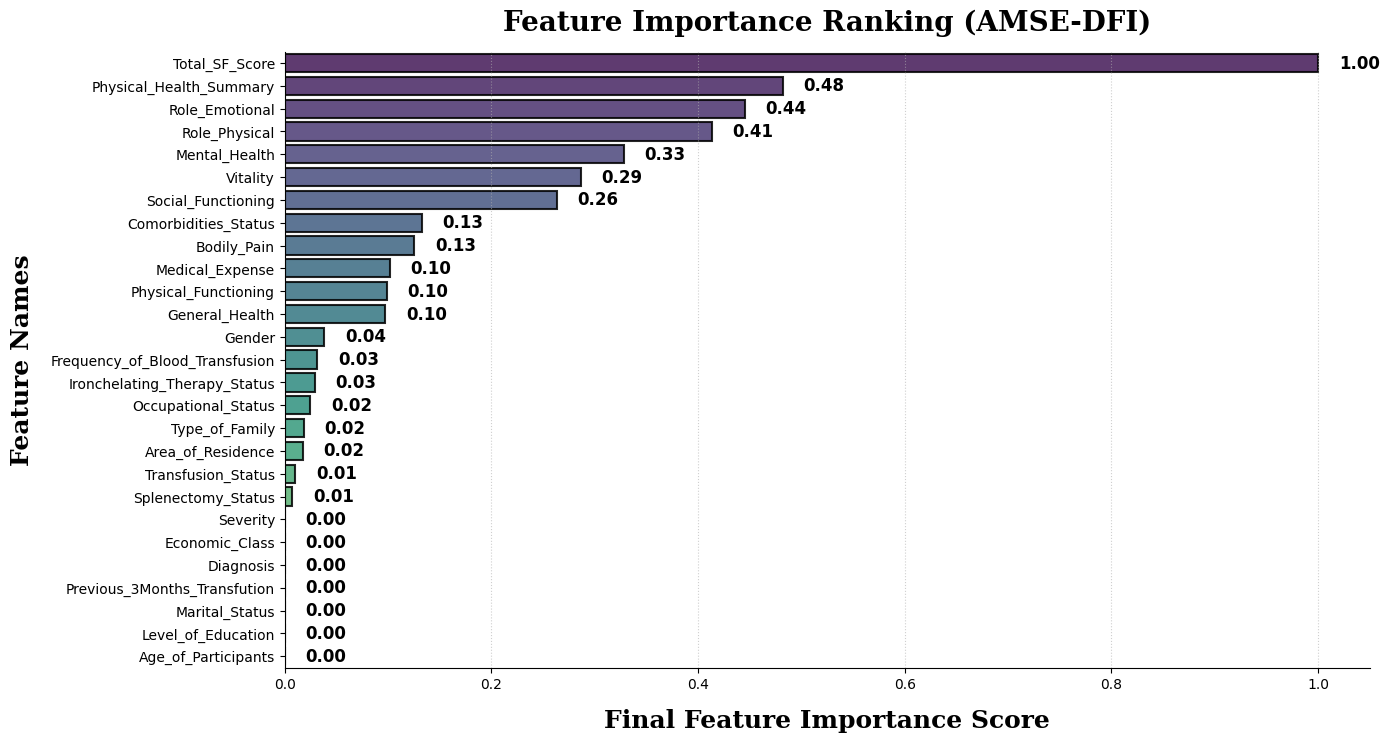

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Run the model and get the final feature importance
result = amse_dfi(X, y)

# Sort the features by importance (Top Features First)
result = result.sort_values('Final_Score', ascending=False)

# Create the figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the horizontal bar chart with improved aesthetics
sns.barplot(
    y=result['Feature'],
    x=result['Final_Score'],
    palette='viridis',  # More professional scientific colormap
    edgecolor='black',  # Sharp edges for clarity
    linewidth=1.5,      # Slightly thicker edges for better visibility
    alpha=0.85          # Slight transparency for a sleek look
)

# Add value labels with better spacing & bold font
for index, value in enumerate(result['Final_Score']):
    ax.text(value + 0.02, index, f"{value:.2f}",
            fontsize=12, color='black', va='center', fontweight='bold')

# Titles and labels with better font styling
plt.xlabel("Final Feature Importance Score", fontsize=18, fontweight='bold', labelpad=12, fontfamily='serif')
plt.ylabel("Feature Names", fontsize=18, fontweight='bold', labelpad=12, fontfamily='serif')
plt.title("Feature Importance Ranking (AMSE-DFI)", fontsize=20, fontweight='bold', pad=15, fontfamily='serif')

# Add a subtle grid for better readability
ax.xaxis.grid(True, linestyle="dotted", alpha=0.6)

# Remove top and right spines for a cleaner look
sns.despine()

# Save as high-quality PDF for Q1 journal submission
plt.savefig("feature_importance.pdf", format='pdf', dpi=600, bbox_inches="tight")

# Show the plot
plt.show()
